In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Load data

In [211]:
nvda_data = pd.read_csv("crwd_1mo_5m.csv")

In [212]:
nvda_data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-11-04 09:30:00-05:00,539.789978,540.580017,534.219971,539.789978,118934,0.0,0.0
1,2025-11-04 09:35:00-05:00,540.027222,540.959900,535.549988,538.885010,37834,0.0,0.0
2,2025-11-04 09:40:00-05:00,539.059998,540.244995,537.109985,539.969971,40625,0.0,0.0
3,2025-11-04 09:45:00-05:00,540.070007,543.880005,539.099976,543.515015,28240,0.0,0.0
4,2025-11-04 09:50:00-05:00,543.020020,546.940002,542.859985,546.815979,39931,0.0,0.0
...,...,...,...,...,...,...,...,...
1597,2025-12-03 15:35:00-05:00,517.909973,518.479980,517.250000,518.080017,24368,0.0,0.0
1598,2025-12-03 15:40:00-05:00,518.015015,518.400024,517.150024,517.520020,27818,0.0,0.0
1599,2025-12-03 15:45:00-05:00,517.369995,520.099976,517.369995,519.989990,56468,0.0,0.0
1600,2025-12-03 15:50:00-05:00,520.250000,523.239990,520.250000,522.190002,123414,0.0,0.0


In [213]:
nvda_data['Dividends'].unique()
nvda_data['Stock Splits'].unique()
nvda = nvda_data.drop(['Dividends', 'Stock Splits'], axis=1)

In [214]:
nvda_data.shape

(1602, 8)

In [215]:
nvda['Log Returns'] = np.log(nvda['Close'] / nvda['Close'].shift(1))

In [216]:
# Garman-Klass volatility estimator
nvda['Intraday Volatility'] = 0.5 * (np.log(nvda['High'] / nvda['Low']) ** 2) - 0.386 * (np.log(nvda['Close'] / nvda['Open']) ** 2)

In [217]:
nvda['Range'] = nvda['High'] - nvda['Low']

In [218]:
nvda

,Datetime,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range
0,2025-11-04 09:30:00-05:00,539.789978,540.580017,534.219971,539.789978,118934,NaN,0.000070,6.360046
1,2025-11-04 09:35:00-05:00,540.027222,540.959900,535.549988,538.885010,37834,-0.001678,0.000049,5.409912
2,2025-11-04 09:40:00-05:00,539.059998,540.244995,537.109985,539.969971,40625,0.002011,0.000016,3.135010
3,2025-11-04 09:45:00-05:00,540.070007,543.880005,539.099976,543.515015,28240,0.006544,0.000023,4.780029
4,2025-11-04 09:50:00-05:00,543.020020,546.940002,542.859985,546.815979,39931,0.006055,0.000009,4.080017
...,...,...,...,...,...,...,...,...,...
1597,2025-12-03 15:35:00-05:00,517.909973,518.479980,517.250000,518.080017,24368,0.000502,0.000003,1.229980
1598,2025-12-03 15:40:00-05:00,518.015015,518.400024,517.150024,517.520020,27818,-0.001081,0.000003,1.250000
1599,2025-12-03 15:45:00-05:00,517.369995,520.099976,517.369995,519.989990,56468,0.004761,0.000004,2.729980
1600,2025-12-03 15:50:00-05:00,520.250000,523.239990,520.250000,522.190002,123414,0.004222,0.000011,2.989990


<Axes: title={'center': 'Log Returns over 5 years for $nvda'}, xlabel='Datetime'>

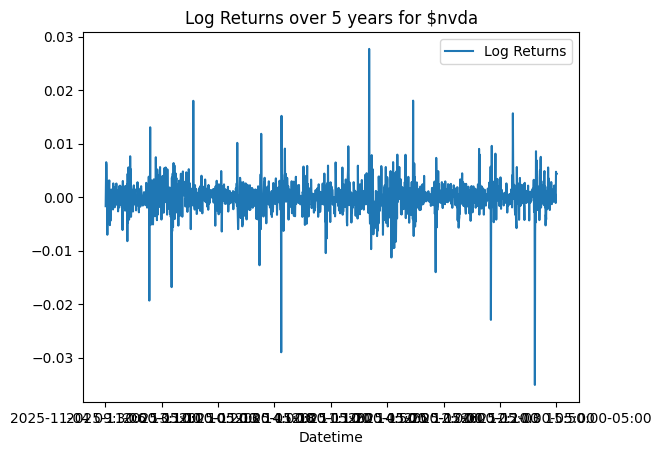

In [220]:
nvda.plot(x='Datetime', y=['Log Returns'], kind='line', title='Log Returns over 5 years for $nvda')

In [ ]:
# nvda.plot(x='Date', y=['Log Returns'], kind='line', title='Log Returns over 5 years for $nvda')

KeyError: 'Date'

In [221]:
# EMA
# 10-min EMA
nvda['EMA-10day'] = nvda['Close'].ewm(span=10, adjust=False).mean()

In [222]:
nvda

,Datetime,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range,EMA-10day
0,2025-11-04 09:30:00-05:00,539.789978,540.580017,534.219971,539.789978,118934,NaN,0.000070,6.360046,539.789978
1,2025-11-04 09:35:00-05:00,540.027222,540.959900,535.549988,538.885010,37834,-0.001678,0.000049,5.409912,539.625438
2,2025-11-04 09:40:00-05:00,539.059998,540.244995,537.109985,539.969971,40625,0.002011,0.000016,3.135010,539.688081
3,2025-11-04 09:45:00-05:00,540.070007,543.880005,539.099976,543.515015,28240,0.006544,0.000023,4.780029,540.383887
4,2025-11-04 09:50:00-05:00,543.020020,546.940002,542.859985,546.815979,39931,0.006055,0.000009,4.080017,541.553358
...,...,...,...,...,...,...,...,...,...,...
1597,2025-12-03 15:35:00-05:00,517.909973,518.479980,517.250000,518.080017,24368,0.000502,0.000003,1.229980,517.478507
1598,2025-12-03 15:40:00-05:00,518.015015,518.400024,517.150024,517.520020,27818,-0.001081,0.000003,1.250000,517.486055
1599,2025-12-03 15:45:00-05:00,517.369995,520.099976,517.369995,519.989990,56468,0.004761,0.000004,2.729980,517.941316
1600,2025-12-03 15:50:00-05:00,520.250000,523.239990,520.250000,522.190002,123414,0.004222,0.000011,2.989990,518.713804


In [224]:
nvda['Date'] = pd.to_datetime(nvda['Datetime'])
nvda

,Datetime,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range,EMA-10day,Date
0,2025-11-04 09:30:00-05:00,539.789978,540.580017,534.219971,539.789978,118934,NaN,0.000070,6.360046,539.789978,2025-11-04 09:30:00-05:00
1,2025-11-04 09:35:00-05:00,540.027222,540.959900,535.549988,538.885010,37834,-0.001678,0.000049,5.409912,539.625438,2025-11-04 09:35:00-05:00
2,2025-11-04 09:40:00-05:00,539.059998,540.244995,537.109985,539.969971,40625,0.002011,0.000016,3.135010,539.688081,2025-11-04 09:40:00-05:00
3,2025-11-04 09:45:00-05:00,540.070007,543.880005,539.099976,543.515015,28240,0.006544,0.000023,4.780029,540.383887,2025-11-04 09:45:00-05:00
4,2025-11-04 09:50:00-05:00,543.020020,546.940002,542.859985,546.815979,39931,0.006055,0.000009,4.080017,541.553358,2025-11-04 09:50:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...
1597,2025-12-03 15:35:00-05:00,517.909973,518.479980,517.250000,518.080017,24368,0.000502,0.000003,1.229980,517.478507,2025-12-03 15:35:00-05:00
1598,2025-12-03 15:40:00-05:00,518.015015,518.400024,517.150024,517.520020,27818,-0.001081,0.000003,1.250000,517.486055,2025-12-03 15:40:00-05:00
1599,2025-12-03 15:45:00-05:00,517.369995,520.099976,517.369995,519.989990,56468,0.004761,0.000004,2.729980,517.941316,2025-12-03 15:45:00-05:00
1600,2025-12-03 15:50:00-05:00,520.250000,523.239990,520.250000,522.190002,123414,0.004222,0.000011,2.989990,518.713804,2025-12-03 15:50:00-05:00


In [ ]:
# nvda = nvda.rename(columns={'Date': 'datestr'})
# nvda['Date'] = nvda['datestr'].str.split().str[0]
# nvda['Date'] = pd.to_datetime(nvda['Date'])
# nvda

In [ ]:
# nvda = nvda.rename(columns={'Date': 'datestr'})

In [ ]:
# nvda['Date'] = nvda['datestr'].str.split().str[0]

In [ ]:
# nvda['Date'] = pd.to_datetime(nvda['Date'])
# nvda

KeyError: 'Date'

In [225]:
nvda['Date'].dtype

datetime64[ns, UTC-05:00]

In [226]:
today = pd.Timestamp.today()
today

Timestamp('2025-12-03 21:30:20.320296')

In [227]:
start_date = today - pd.Timedelta(days=30)
start_date

Timestamp('2025-11-03 21:30:20.320296')

<Axes: title={'center': 'Close & 10-day EMA for $nvda'}, xlabel='Date'>

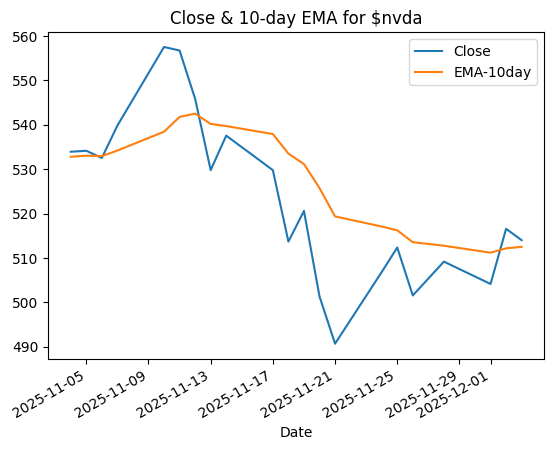

In [ ]:
last_30_days_nvda = nvda[nvda['Date'] >= start_date]
last_30_days_nvda.plot(x='Date', y=['Close', 'EMA-10day'], kind='line', title='Close & 10-day EMA for $nvda')

In [229]:
data = nvda[['Date', 'Log Returns', 'Intraday Volatility', 'Range']]

In [230]:
data.shape

(1602, 4)

In [231]:
data.set_index('Date', inplace=True)

In [232]:
data

,Log Returns,Intraday Volatility,Range
Date,,,
2025-11-04 09:30:00-05:00,NaN,0.000070,6.360046
2025-11-04 09:35:00-05:00,-0.001678,0.000049,5.409912
2025-11-04 09:40:00-05:00,0.002011,0.000016,3.135010
2025-11-04 09:45:00-05:00,0.006544,0.000023,4.780029
2025-11-04 09:50:00-05:00,0.006055,0.000009,4.080017
...,...,...,...
2025-12-03 15:35:00-05:00,0.000502,0.000003,1.229980
2025-12-03 15:40:00-05:00,-0.001081,0.000003,1.250000
2025-12-03 15:45:00-05:00,0.004761,0.000004,2.729980


In [233]:
states = ['bull', 'bear', 'rebound']

"""
States:
    bull: low-vol, positive mean
    bear: high-vol, negative mean
    rebound: high-vol, positive mean
"""

'\nStates:\n    bull: low-vol, positive mean\n    bear: high-vol, negative mean\n    rebound: high-vol, positive mean\n'

## Feature Engineering

## HMM Prelim

In [234]:
def logsumexp(log_vals, axis=None):
    """
    Stable log-sum-exp: log(sum(exp(log_vals))) along given axis.
    """
    m = np.max(log_vals, axis=axis, keepdims=True)
    return m + np.log(np.sum(np.exp(log_vals - m), axis=axis, keepdims=True))


In [235]:
def gaussian_logpdf(x, mean, cov):
    """
    x: (T, D)
    mean: (D,)
    cov: (D, D) positive definite
    Returns: log p(x_t | state) for each t, shape (T,)
    """
    x = np.atleast_2d(x)
    D = x.shape[1]
    mean = mean.reshape(1, D)
    cov = np.atleast_2d(cov)
    
    # Precompute
    inv_cov = np.linalg.inv(cov)
    sign, logdet = np.linalg.slogdet(cov)
    if sign <= 0:
        raise ValueError("Covariance not positive definite")

    diff = x - mean
    # Mahalanobis term
    mah = np.sum(diff @ inv_cov * diff, axis=1)  # shape (T,)
    
    return -0.5 * (D * np.log(2 * np.pi) + logdet + mah)


In [236]:
def forward_backward_log(X, pi, A, means, covs):
    """
    X: (T, D)
    pi: (K,)
    A: (K, K)
    means: (K, D)
    covs:  (K, D, D)
    
    Returns:
        log_alpha: (T, K)
        log_beta:  (T, K)
        log_lik:   scalar log-likelihood
    """
    T, D = X.shape
    K = pi.shape[0]
    
    # Precompute emission log-likelihoods: log B_t(k) = log p(x_t | state=k)
    log_B = np.zeros((T, K))
    for k in range(K):
        log_B[:, k] = gaussian_logpdf(X, means[k], covs[k])
    
    log_pi = np.log(pi)
    log_A = np.log(A)
    
    # Forward pass: log_alpha
    log_alpha = np.zeros((T, K))
    log_alpha[0] = log_pi + log_B[0]
    
    for t in range(1, T):
        # log_alpha[t, j] = log( sum_i exp(log_alpha[t-1, i] + log_A[i, j]) ) + log_B[t, j]
        trans = log_alpha[t-1][:, None] + log_A  # shape (K, K)
        log_alpha[t] = logsumexp(trans, axis=0).ravel() + log_B[t]
    
    # Backward pass: log_beta
    log_beta = np.zeros((T, K))
    log_beta[-1] = 0.0  # log(1)
    
    for t in range(T-2, -1, -1):
        # log_beta[t, i] = log( sum_j A[i,j] * B_{t+1}(j) * beta_{t+1}(j) )
        trans = log_A + (log_B[t+1] + log_beta[t+1])[None, :]  # shape (K, K)
        log_beta[t] = logsumexp(trans, axis=1).ravel()
    
    # Total log-likelihood: log p(X) = logsumexp(log_alpha[T-1])
    log_lik = logsumexp(log_alpha[-1], axis=0).item()
    
    return log_alpha, log_beta, log_lik, log_B


In [237]:
def e_step(X, pi, A, means, covs):
    """
    Runs forward-backward and computes:
      gamma_t(k) = P(Z_t = k | X)
      xi_t(i,j)  = P(Z_t = i, Z_{t+1} = j | X)
    """
    T, D = X.shape
    K = pi.shape[0]
    
    log_alpha, log_beta, log_lik, log_B = forward_backward_log(X, pi, A, means, covs)
    
    # gamma: (T, K)
    log_gamma = log_alpha + log_beta  # unnormalized
    log_gamma = log_gamma - logsumexp(log_gamma, axis=1)  # normalize per t
    gamma = np.exp(log_gamma)
    
    # xi: (T-1, K, K)
    log_A = np.log(A)
    log_xi = np.zeros((T-1, K, K))
    for t in range(T-1):
        # log xi_t(i,j) ∝ log_alpha[t,i] + log_A[i,j] + log_B[t+1,j] + log_beta[t+1,j]
        log_unnorm = (
            log_alpha[t][:, None]
            + log_A
            + (log_B[t+1] + log_beta[t+1])[None, :]
        )  # (K, K)
        log_xi[t] = log_unnorm - logsumexp(log_unnorm)  # normalize
    xi = np.exp(log_xi)
    
    return gamma, xi, log_lik


In [238]:
def m_step(X, gamma, xi):
    """
    X: (T, D)
    gamma: (T, K)
    xi: (T-1, K, K)
    """
    T, D = X.shape
    Tm1 = T - 1
    K = gamma.shape[1]
    
    # Initial state distribution
    pi_new = gamma[0]  # shape (K,)
    
    # Transition matrix
    xi_sum = xi.sum(axis=0)          # (K, K)
    gamma_sum = gamma[:-1].sum(axis=0)  # (K,)
    A_new = xi_sum / gamma_sum[:, None]
    
    # Means and covariances
    means_new = np.zeros((K, D))
    covs_new = np.zeros((K, D, D))
    
    for k in range(K):
        # Weighted mean
        w = gamma[:, k][:, None]  # (T,1)
        denom = w.sum()
        means_new[k] = (w * X).sum(axis=0) / denom
        
        # Weighted covariance
        diff = X - means_new[k]
        cov = (w * diff).T @ diff / denom
        # Regularize slightly in case of numerical issues
        cov += 1e-6 * np.eye(D)
        covs_new[k] = cov
    
    return pi_new, A_new, means_new, covs_new


In [239]:
def fit_hmm(X, K=2, max_iter=100, tol=1e-4, random_state=0):
    """
    Fit a K-state Gaussian HMM to data X using EM.
    
    X: (T, D)
    Returns:
      pi, A, means, covs, log_liks
    """
    rng = np.random.default_rng(random_state)
    T, D = X.shape
    
    # --- Initialization ---
    # Randomly assign states and estimate initial means/covs roughly
    # or use k-means if you want nicer init.
    gamma_init = rng.random((T, K))
    gamma_init /= gamma_init.sum(axis=1, keepdims=True)
    
    pi = gamma_init[0]
    pi /= pi.sum()
    
    # Uniform transition matrix to start
    A = np.ones((K, K)) / K
    
    # Means: pick random rows of X
    means = X[rng.choice(T, size=K, replace=False)]
    
    # Covs: start as global covariance
    global_cov = np.cov(X.T) if D > 1 else np.array([[np.var(X)]])
    covs = np.array([global_cov.copy() for _ in range(K)])
    
    log_liks = []
    prev_log_lik = -np.inf
    
    for it in range(max_iter):
        # E-step
        gamma, xi, log_lik = e_step(X, pi, A, means, covs)
        log_liks.append(log_lik)
        
        # M-step
        pi, A, means, covs = m_step(X, gamma, xi)
        
        # Convergence check
        if it > 0 and abs(log_lik - prev_log_lik) < tol:
            print(f"Converged at iteration {it}, log-lik = {log_lik:.3f}")
            break
        
        prev_log_lik = log_lik
    
    return pi, A, means, covs, np.array(log_liks)


In [240]:
def viterbi(X, pi, A, means, covs):
    T, D = X.shape
    K = pi.shape[0]
    
    log_pi = np.log(pi)
    log_A = np.log(A)
    
    # Emission log-likelihoods
    log_B = np.zeros((T, K))
    for k in range(K):
        log_B[:, k] = gaussian_logpdf(X, means[k], covs[k])
    
    # DP arrays
    delta = np.zeros((T, K))  # best log-prob up to t, ending in k
    psi = np.zeros((T, K), dtype=int)  # argmax pointers
    
    delta[0] = log_pi + log_B[0]
    
    for t in range(1, T):
        for j in range(K):
            scores = delta[t-1] + log_A[:, j]
            psi[t, j] = np.argmax(scores)
            delta[t, j] = scores[psi[t, j]] + log_B[t, j]
    
    # Backtrack
    states = np.zeros(T, dtype=int)
    states[-1] = np.argmax(delta[-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    
    return states


### Looking at results

In [241]:
# Keep only the rows where all 3 features are non-missing
X = data[['Log Returns', 'Intraday Volatility', 'Range']].dropna().values  # shape (T, 3)

# If you also want to keep the aligned dates:
aligned_dates = data[['Log Returns', 'Intraday Volatility', 'Range']].dropna().index


In [242]:
X.shape[0] == aligned_dates.shape[0]

True

In [243]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=1)
X_stdized = (X - X_mean) / X_std

In [244]:
K = 2  # or 3 if you want a 3-regime model

pi, A, means, covs, log_liks = fit_hmm(X_stdized, K=K, max_iter=100, tol=1e-4, random_state=0)

print("Initial state probabilities (pi):")
print(pi)
print("\nTransition matrix (A):")
print(A)
print("\nState means (in standardized units):")
print(means)
print("\nFinal log-likelihood:", log_liks[-1])


C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\3576870003.py:22: RuntimeWarning: divide by zero encountered in log
  log_pi = np.log(pi)


Converged at iteration 36, log-lik = -2127.838
Initial state probabilities (pi):
[0. 1.]

Transition matrix (A):
[[0.89699806 0.10300194]
 [0.31869945 0.68130055]]

State means (in standardized units):
[[ 0.02365784 -0.24813997 -0.41507879]
 [-0.07299942  0.7656689   1.28078086]]

Final log-likelihood: -2127.838384575447


In [245]:
# Convert means from standardized back to original scale
means_original = means * X_std + X_mean
print("State means in original feature units:")
print(means_original)


State means in original feature units:
[[ 5.56334981e-05  2.89246112e-06  1.34646356e+00]
 [-2.45090806e-04  1.95421455e-05  3.50971424e+00]]


In [246]:
states = viterbi(X_stdized, pi, A, means, covs)  # shape (T,)

# Attach regimes back to your dates
regime_series = np.zeros(len(data)) * np.nan
regime_series[:len(aligned_dates)] = np.nan  # we'll align properly below

# Easier: create a pandas Series directly
regimes = pd.Series(states, index=aligned_dates, name='Regime')

C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\3407106033.py:5: RuntimeWarning: divide by zero encountered in log
  log_pi = np.log(pi)


In [247]:
print(states)
print(regimes)

[1 1 1 ... 1 1 1]
Date
2025-11-04 09:35:00-05:00    1
2025-11-04 09:40:00-05:00    1
2025-11-04 09:45:00-05:00    1
2025-11-04 09:50:00-05:00    1
2025-11-04 09:55:00-05:00    0
                            ..
2025-12-03 15:35:00-05:00    0
2025-12-03 15:40:00-05:00    0
2025-12-03 15:45:00-05:00    1
2025-12-03 15:50:00-05:00    1
2025-12-03 15:55:00-05:00    1
Name: Regime, Length: 1601, dtype: int64


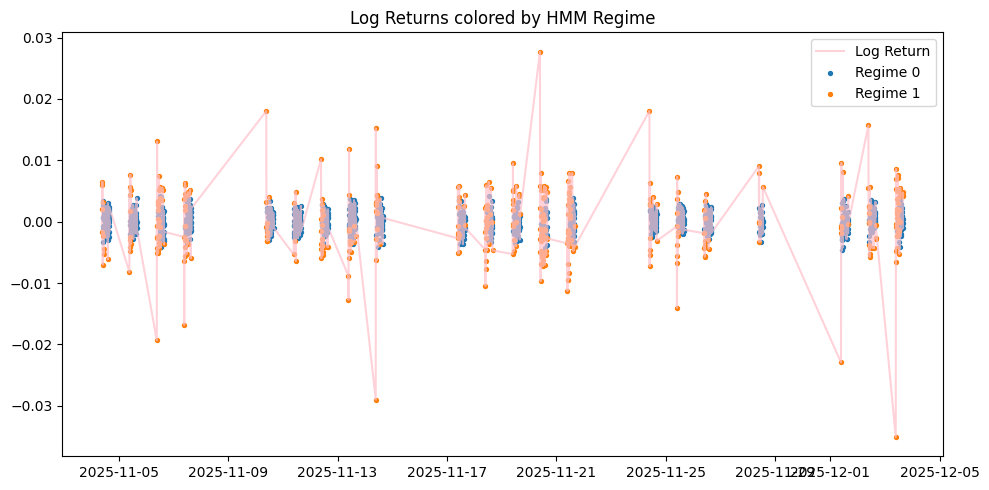

In [248]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(aligned_dates, data.loc[aligned_dates, 'Log Returns'], color='pink', label='Log Return', alpha=0.7)

# Color background by regime
for k in range(K):
    mask = (regimes == k)
    ax.scatter(aligned_dates[mask], data.loc[aligned_dates[mask], 'Log Returns'],
               s=8, label=f'Regime {k}')

ax.legend()
ax.set_title('Log Returns colored by HMM Regime')
plt.tight_layout()
plt.show()


#### Univariate

In [249]:
X1 = data['Log Returns'].dropna().values.reshape(-1, 1)
aligned_dates1 = data['Log Returns'].dropna().index

pi, A, means, covs, log_liks = fit_hmm(X1, K=2, max_iter=100, tol=1e-4, random_state=0)
states1 = viterbi(X1, pi, A, means, covs)
regimes1 = pd.Series(states1, index=aligned_dates1, name='Regime')


Converged at iteration 57, log-lik = 7311.970


### Version 2

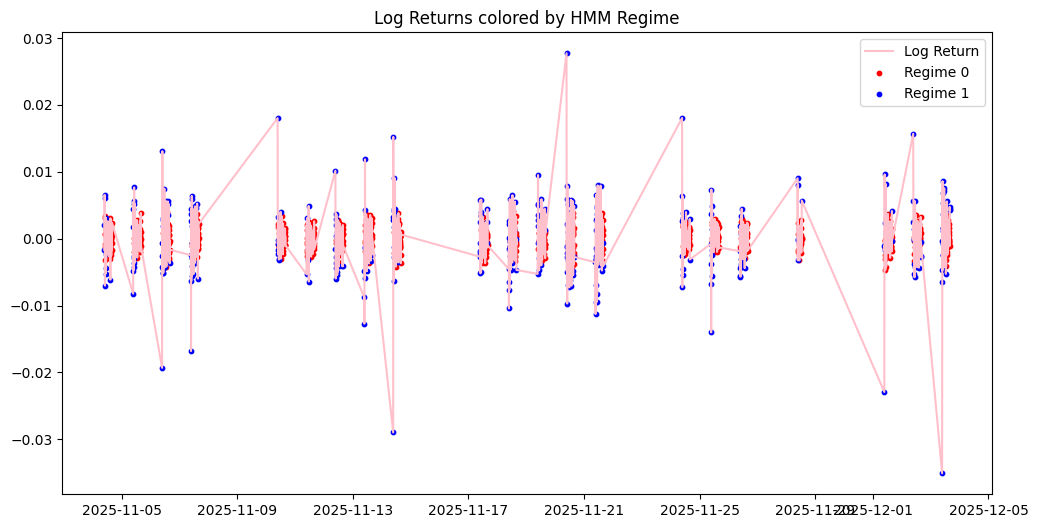

In [250]:
fig, ax = plt.subplots(figsize=(12,6))

# Plot log returns first
ax.plot(aligned_dates, data.loc[aligned_dates, 'Log Returns'], color='pink', label='Log Return')

# Plot regimes with scatter points (or colored background)
colors = ['red', 'blue', 'green']  # adjust per regime
for k in range(K):
    mask = (regimes == k)
    ax.scatter(aligned_dates[mask], data.loc[aligned_dates[mask], 'Log Returns'],
               color=colors[k], s=10, label=f'Regime {k}')

ax.legend()
ax.set_title('Log Returns colored by HMM Regime')
plt.show()


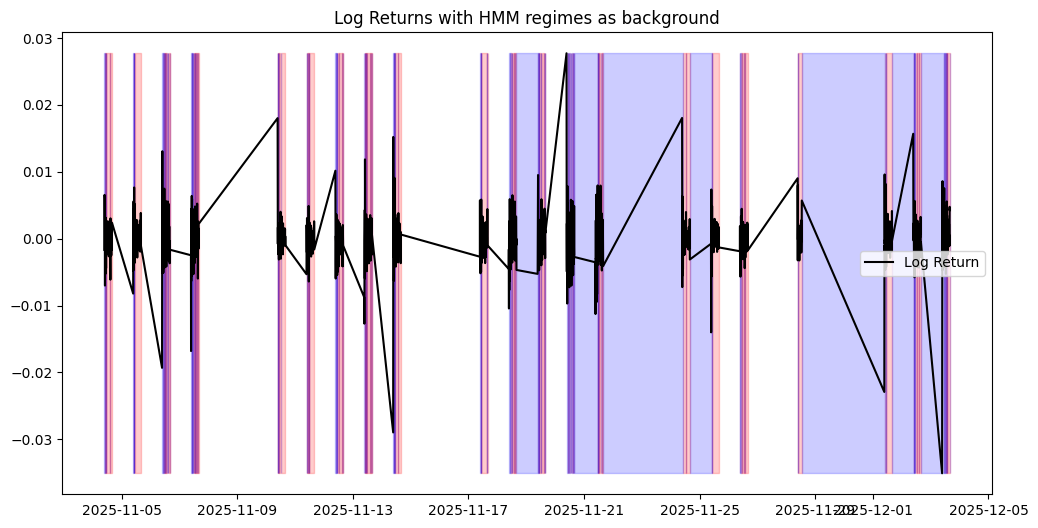

In [251]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(aligned_dates, data.loc[aligned_dates, 'Log Returns'], color='black', label='Log Return')

# Add colored background
for k in range(K):
    mask = (regimes == k)
    ax.fill_between(aligned_dates, data['Log Returns'].min(), data['Log Returns'].max(),
                    where=mask, color=colors[k], alpha=0.2)

ax.legend()
ax.set_title('Log Returns with HMM regimes as background')
plt.show()


### Repeat for 3 states (K=3)

C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\3576870003.py:22: RuntimeWarning: divide by zero encountered in log
  log_pi = np.log(pi)


Converged at iteration 78, log-lik = -1198.766
Initial state probabilities (pi):
[0. 0. 1.]

Transition matrix (A):
[[0.71412278 0.26777719 0.01810003]
 [0.27190677 0.62681507 0.10127817]
 [0.0137595  0.44684829 0.53939221]]

State means (in standardized units):
[[ 0.02699404 -0.31519841 -0.66478089]
 [-0.04374559 -0.06755957  0.11384131]
 [ 0.06825034  1.42499696  2.02067786]]

Final log-likelihood: -1198.7664469622782
State means in original feature units:
[[ 6.60132136e-05  1.79116682e-06  1.02794178e+00]
 [-1.54075012e-04  5.85811552e-06  2.02115782e+00]
 [ 1.94371649e-04  3.03702261e-05  4.45353214e+00]]


C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\3407106033.py:5: RuntimeWarning: divide by zero encountered in log
  log_pi = np.log(pi)


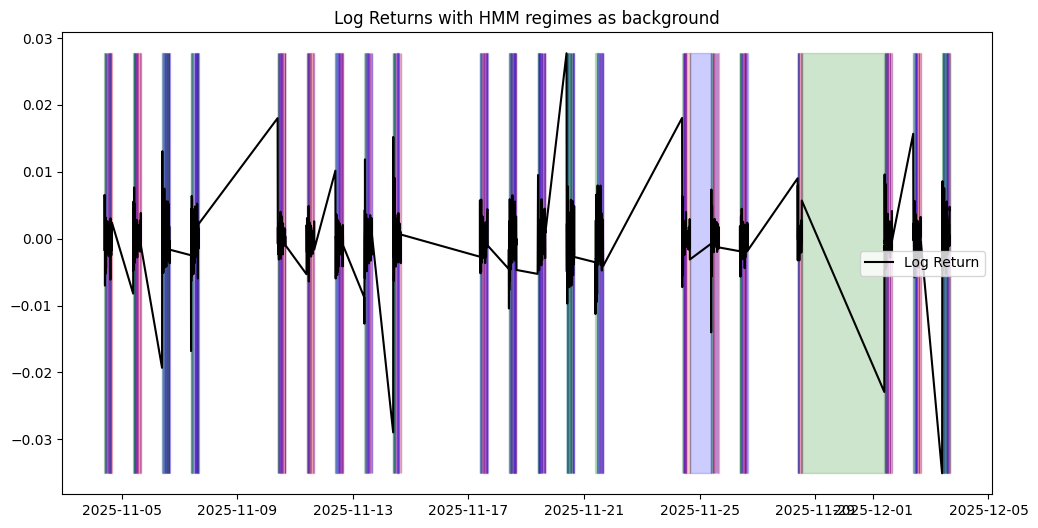

In [252]:
K = 3  # or 3 if you want a 3-regime model

pi, A, means, covs, log_liks = fit_hmm(X_stdized, K=K, max_iter=100, tol=1e-4, random_state=0)

print("Initial state probabilities (pi):")
print(pi)
print("\nTransition matrix (A):")
print(A)
print("\nState means (in standardized units):")
print(means)
print("\nFinal log-likelihood:", log_liks[-1])

# Convert means from standardized back to original scale
means_original = means * X_std + X_mean
print("State means in original feature units:")
print(means_original)

states = viterbi(X_stdized, pi, A, means, covs)  # shape (T,)

# Attach regimes back to your dates
regime_series = np.zeros(len(data)) * np.nan
regime_series[:len(aligned_dates)] = np.nan  # we'll align properly below

# Easier: create a pandas Series directly
regimes = pd.Series(states, index=aligned_dates, name='Regime')

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(aligned_dates, data.loc[aligned_dates, 'Log Returns'], color='black', label='Log Return')

colors = ['red', 'blue', 'green']  # adjust per regime

# Add colored background
for k in range(K):
    mask = (regimes == k)
    ax.fill_between(aligned_dates, data['Log Returns'].min(), data['Log Returns'].max(),
                    where=mask, color=colors[k], alpha=0.2)

ax.legend()
ax.set_title('Log Returns with HMM regimes as background')
plt.show()

In [253]:
regime_labels = []
for k in range(K):
    ret = means_original[k, 0]
    rng = means_original[k, 2]
    if ret > 0 and rng < 0.2:
        regime_labels.append('bull')
    elif ret < 0 and rng > 0.4:
        regime_labels.append('bear')
    else:
        regime_labels.append('rebound')
regimes_named = regimes.map(lambda x: regime_labels[x])

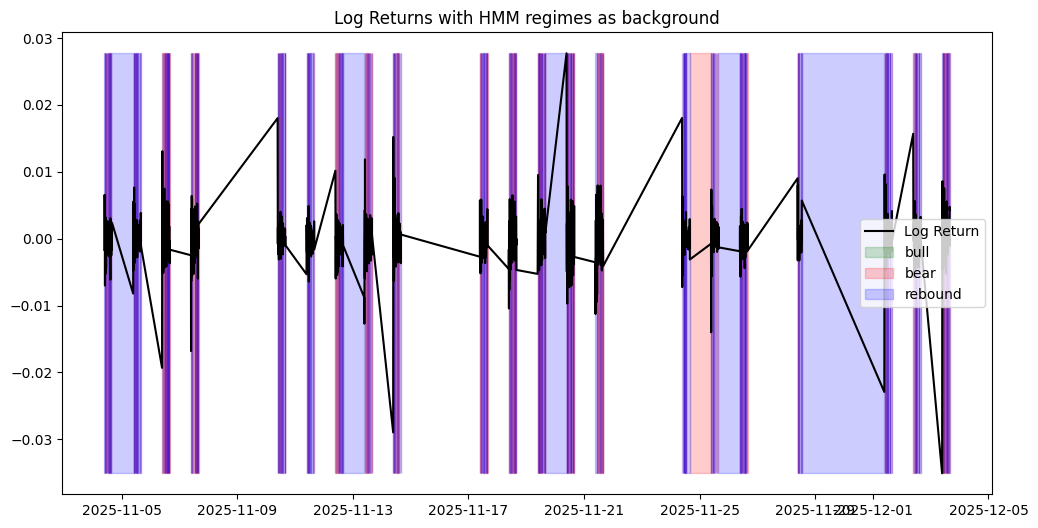

In [254]:
fig, ax = plt.subplots(figsize=(12,6))

# Log returns
ax.plot(aligned_dates, data.loc[aligned_dates, 'Log Returns'], color='black', label='Log Return')

# Color background by regime
colors_dict = {'bull':'green', 'bear':'red', 'rebound':'blue'}
for label, color in colors_dict.items():
    mask = (regimes_named == label)
    ax.fill_between(aligned_dates, 
                    data['Log Returns'].min(), 
                    data['Log Returns'].max(), 
                    where=mask, color=color, alpha=0.2, label=label)

ax.legend()
ax.set_title('Log Returns with HMM regimes as background')
plt.show()


In [255]:
data['Regime'] = regimes_named
print(data.groupby('Regime')[['Log Returns', 'Intraday Volatility', 'Range']].mean())

         Log Returns  Intraday Volatility     Range
Regime                                             
bear       -0.000152             0.000006  2.040177
rebound     0.000089             0.000008  1.745069


C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\1771397033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = regimes_named


C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\796733247.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = regimes_named
C:\Users\Kylie\AppData\Local\Temp\ipykernel_8448\796733247.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = data['Regime'].map(signal_map)


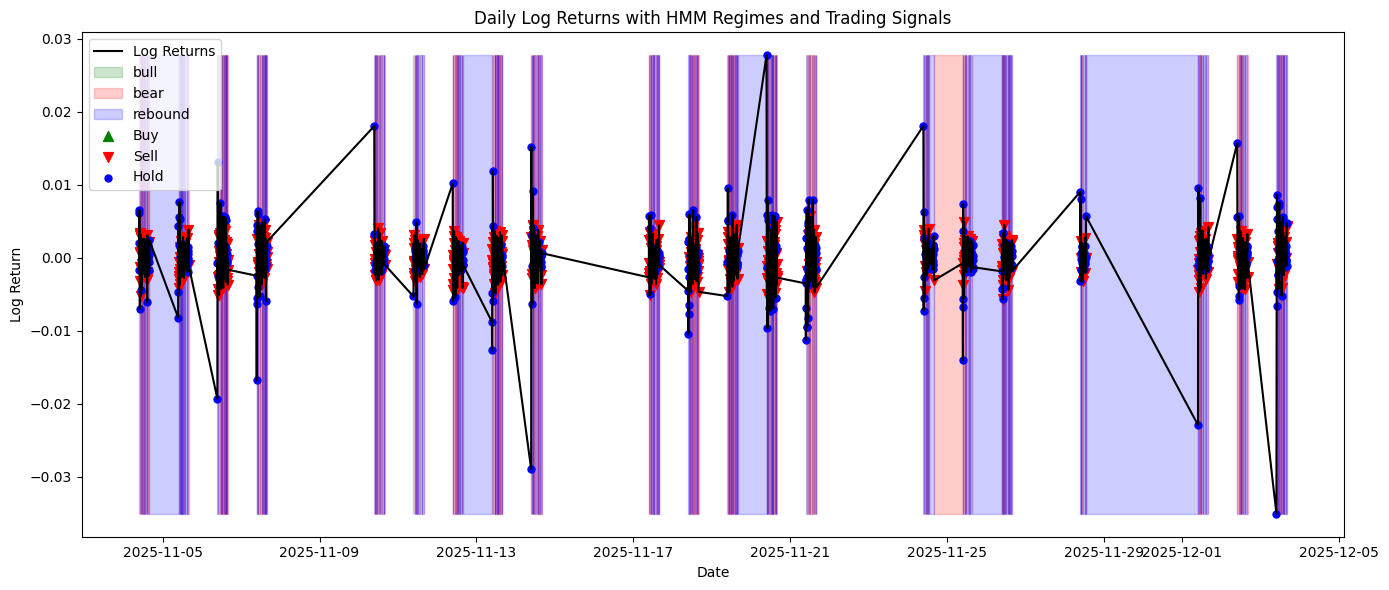

In [256]:
# Assume you already have:
# data: DataFrame with 'Log Returns' and index = dates
# regimes: Series of integer HMM states aligned with data
# regime_labels: list of regime names, e.g. ['bear', 'bull', 'rebound']

# Map states to named regimes
regimes_named = regimes.map(lambda x: regime_labels[x])
data['Regime'] = regimes_named

# Map regimes to simple trading signals
# Example rule: bull -> buy, rebound -> hold, bear -> sell
signal_map = {'bull':'buy', 'rebound':'hold', 'bear':'sell'}
data['Signal'] = data['Regime'].map(signal_map)

# Define colors for regimes
colors_dict = {'bull':'green', 'bear':'red', 'rebound':'blue'}

# Plot
fig, ax = plt.subplots(figsize=(14,6))

# Plot log returns line
ax.plot(data.index, data['Log Returns'], color='black', label='Log Returns')

# Shade regimes
for label, color in colors_dict.items():
    mask = (data['Regime'] == label)
    ax.fill_between(data.index, 
                    data['Log Returns'].min(), 
                    data['Log Returns'].max(), 
                    where=mask, color=color, alpha=0.2, label=label)

# Optional: mark buy/sell signals with markers
buy_mask = data['Signal'] == 'buy'
sell_mask = data['Signal'] == 'sell'
hold_mask = data['Signal'] == 'hold'

ax.scatter(data.index[buy_mask], data['Log Returns'][buy_mask], marker='^', color='green', s=50, label='Buy')
ax.scatter(data.index[sell_mask], data['Log Returns'][sell_mask], marker='v', color='red', s=50, label='Sell')
ax.scatter(data.index[hold_mask], data['Log Returns'][hold_mask], marker='o', color='blue', s=25, label='Hold')

ax.set_title('Daily Log Returns with HMM Regimes and Trading Signals')
ax.set_xlabel('Date')
ax.set_ylabel('Log Return')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
